In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../utils")
from reader import read_record

In [20]:
raw, events = read_record(
    '../data/raw/SC4001E0-PSG.edf',
    '../data/raw/SC4001EC-Hypnogram.edf',
    channel='EEG Fpz-Cz'
)

signal = raw.get_data()[0]  
sfreq = raw.info['sfreq']
print("Sampling frequency:", sfreq)

Extracting EDF parameters from d:\UNI\پروژه پایانی\Sleep Stage Project 1.0\data\raw\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


d:\UNI\پروژه پایانی\Sleep Stage Project 1.0\notebooks\../utils\reader.py:19: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True)
d:\UNI\پروژه پایانی\Sleep Stage Project 1.0\notebooks\../utils\reader.py:19: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True)
d:\UNI\پروژه پایانی\Sleep Stage Project 1.0\notebooks\../utils\reader.py:19: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\UNI\پروژه پایانی\Sleep Stage Project 1.0\notebooks\../utils\reader.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


Used Annotations descriptions: [np.str_('Sleep stage 1'), np.str_('Sleep stage 2'), np.str_('Sleep stage 3'), np.str_('Sleep stage 4'), np.str_('Sleep stage ?'), np.str_('Sleep stage R'), np.str_('Sleep stage W')]
Sampling frequency: 64.0


In [21]:
epoch_duration = 30  
samples_per_epoch = int(epoch_duration * sfreq)


n_epochs = len(events)

X = np.array([
    signal[i * samples_per_epoch:(i + 1) * samples_per_epoch]
    for i in range(n_epochs)
])
y = np.array([e[2] for e in events])


In [22]:
print("X shape:", X.shape)  
print("y shape:", y.shape)  
print("Labels:", np.unique(y, return_counts=True))

X shape: (154, 1920)
y shape: (154,)
Labels: (array([-1,  0,  1,  2,  3,  4]), array([ 1, 12, 24, 40, 71,  6]))


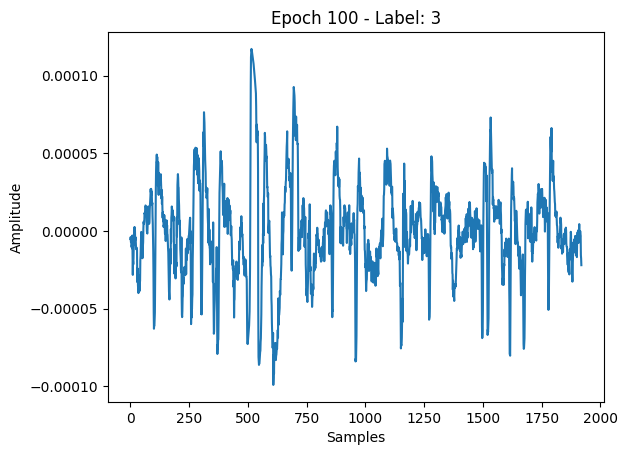

In [23]:
plt.plot(X[100])
plt.title(f"Epoch 100 - Label: {y[100]}")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

In [25]:
import os

save_path = '../data/processed'
os.makedirs(save_path, exist_ok=True)
np.savez("../data/processed/SC4001E0_data.npz", X=X, y=y)
print(f'File Saved: SC4001E0_data.npz')

File Saved: SC4001E0_data.npz
